# Chapter 18 How to Develop ARIMA Models for Multi-step Energy Usage Forecasting

In this tutorial, you will discover how to develop and evaluate an autoregression model for multi-step forecasting household power consumption. After completing this tutorial, you will know:
- How to create and analyze autocorrelation and partial autocorrelation plots for univariate time series data.
- How to use the findings from autocorrelation plots to configure an autoregression model.
- How to develop and evaluate an autocorrelation model used to make one-week forecasts.

Let’s get started.

# 18.1 Tutorial Overview
This tutorial is divided into five parts; they are:
1. Problem Description
2. Load and Prepare Dataset
3. Model Evaluation
4. Autocorrelation Analysis
5. Develop an Autoregressive Model

## 18.2 Problem Description

The *Household Power Consumption dataset* is a multivariate time series dataset that describes the electricity consumption for a single household over four years.

The data was collected between December 2006 and November 2010 and observations of power consumption within the household were collected every minute. It is a multivariate series comprised of seven variables
(besides the date and time); they are:
- global active power: The total active power consumed by the household (kilowatts).
- global reactive power: The total reactive power consumed by the household (kilowatts). 
- voltage: Average voltage (volts).
- global intensity: Average current intensity (amps).
- sub metering 1: Active energy for kitchen (watt-hours of active energy).
- sub metering 2: Active energy for laundry (watt-hours of active energy).
- sub metering 3: Active energy for climate control systems (watt-hours of active energy).

## 18.3 Load and Prepare Dataset

**In the interest of brevity**, refer to Chapter 17 for the details.

## 18.4 Model Evaluation

**In the interest of brevity**, refer to Chapter 18 for the details.

## 18.5 Autocorrelation Analysis

Statistical correlation summarizes the strength of the relationship between two variables. We can assume the distribution of each variable fits a Gaussian (bell curve) distribution. If this is the case, we can use the Pearson’s correlation coefficient to summarize the correlation between the variables. The Pearson’s correlation coefficient is a number between -1 and 1 that describes a negative or positive correlation respectively. A value of zero indicates no correlation.

统计相关性总结了两个变量之间关系的强度。我们可以假设每个变量的分布拟合高斯（钟形曲线）分布。如果是这种情况，我们可以使用皮尔逊相关系数来总结变量之间的相关性。皮尔逊相关系数是介于 -1 和 1 之间的数字，分别描述负相关或正相关。值为零表示没有相关性。

We can calculate the correlation for time series observations with observations with previous time steps, called lags. Because the correlation of the time series observations is calculated with values of the same series at previous times, this is called a serial correlation, or an **autocorrelation**.

A plot of the autocorrelation of a time series by lag is called the AutoCorrelation Function.

A partial autocorrelation function or PACF is a summary of the relationship between an observation in a time series with observations at prior time steps with the relationships of intervening observations removed.偏自相关函数或 PACF 是时间序列中的观测值与先前时间步长的观测值与移除的干预观测值之间的关系的汇总。

The autocorrelation for an observation and an observation at a prior time step is comprised of both the direct correlation and indirect correlations. These indirect correlations are a linear function of the correlation of the observation, with observations at intervening time steps. It is these indirect correlations that the partial autocorrelation function seeks to remove. Without going into the math, this is the intuition for the partial autocorrelation. We can calculate auto- correlation and partial autocorrelation plots using the plot acf() and plot pacf() Statsmodels functions respectively.观测值和先前时间步长的观测值的自相关由直接相关和间接相关组成。这些间接相关性是观测值相关性的线性函数，观测值处于中间时间步长。偏自相关函数试图消除的正是这些间接相关性。在不进行数学计算的情况下，这是偏自相关的直觉。我们可以分别使用 acf（） 和 pacf（） 统计模型函数计算自相关和部分自相关图。

In order to calculate and plot the autocorrelation, we must convert the data into a univariate time series. Specifically, the observed daily total power consumed. The to series() function below will take the multivariate data divided into weekly windows and will return a single univariate time series.为了计算和绘制自相关，我们必须将数据转换为单变量时间序列。具体而言，观察到的每日总功耗。下面的 to series（） 函数将把多变量数据分成每周窗口，并返回单个单变量时间序列。

PAC（Partical Autocorrelation Coefficient 偏自相关系数）：同自相关系数大同小异，在计算相关性时移除了中间变量的间接影响。

PACF（Partial Autocorrelation Function偏自相关函数）：偏自相关系数构成的序列。


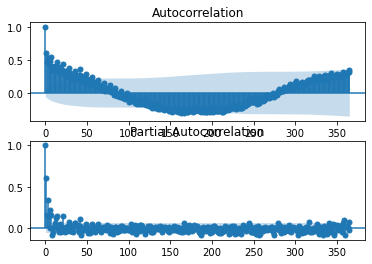

In [2]:
# acf and pacf plots of total power usage
from numpy import split
from numpy import array
from pandas import read_csv
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

# split a univariate dataset into train/test sets
def split_dataset(data):
    # split into standard weeks
    train, test = data[1:-328], data[-328:-6]
    # restructure into windows of weekly data
    train = array(split(train, len(train)/7))
    test = array(split(test, len(test)/7))
    return train, test

# convert windows of weekly multivariate data into a series of total power
def to_series(data):
    # extract just the total power from each week
    series = [week[:, 0] for week in data]
    # flatten into a single series
    series = array(series).flatten()
    return series

# load the new file
dataset = read_csv('household_power_consumption_days.csv', header=0, infer_datetime_format=True, parse_dates=['datetime'], index_col=['datetime'])
# split into train and test
train, test = split_dataset(dataset.values)
# convert training data into a series
series = to_series(train)
# plots
pyplot.figure()
lags = 365
# acf
axis = pyplot.subplot(2, 1, 1)
plot_acf(series, ax=axis, lags=lags)
# pacf
axis = pyplot.subplot(2, 1, 2)
plot_pacf(series, ax=axis, lags=lags)
# show plot
pyplot.show()

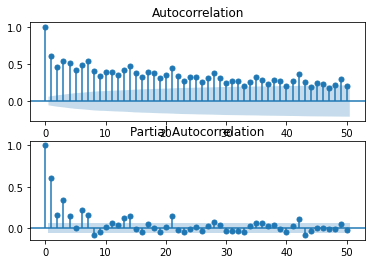

In [3]:
# acf and pacf plots of total power usage
from numpy import split
from numpy import array
from pandas import read_csv
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

# split a univariate dataset into train/test sets
def split_dataset(data):
    # split into standard weeks
    train, test = data[1:-328], data[-328:-6]
    # restructure into windows of weekly data
    train = array(split(train, len(train)/7))
    test = array(split(test, len(test)/7))
    return train, test

# convert windows of weekly multivariate data into a series of total power
def to_series(data):
    # extract just the total power from each week
    series = [week[:, 0] for week in data]
    # flatten into a single series
    series = array(series).flatten()
    return series

# load the new file
dataset = read_csv('household_power_consumption_days.csv', header=0, infer_datetime_format=True, parse_dates=['datetime'], index_col=['datetime'])
# split into train and test
train, test = split_dataset(dataset.values)
# convert training data into a series
series = to_series(train)
# plots
pyplot.figure()
lags = 50
# acf
axis = pyplot.subplot(2, 1, 1)
plot_acf(series, ax=axis, lags=lags)
# pacf
axis = pyplot.subplot(2, 1, 2)
plot_pacf(series, ax=axis, lags=lags)
# show plot
pyplot.show()

The ACF plot indicates that there is a strong autocorrelation component, whereas the PACF plot indicates that this component is distinct for the first approximately seven lag observations. This suggests that a good starting model would be an AR(7); that is an autoregression model with seven lag observations used as input. ACF 图表示存在强自相关分量，而 PACF 图表示该分量对于前大约七个滞后观测值是不同的。这表明一个好的起始模型是 AR（7）;这是一个自回归模型，其中七个滞后观测值用作输入。

## 18.6 Develop an Autoregressive Model

For more information on autoregressive models see Chapter 5. The Statsmodels library provides multiple ways of developing an AR model, such as using the **AR, ARMA, ARIMA, and SARIMAX** classes.

/Users/fengxuedong/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


arima: [381.604] 393.8, 398.9, 357.0, 377.1, 393.8, 306.0, 432.2


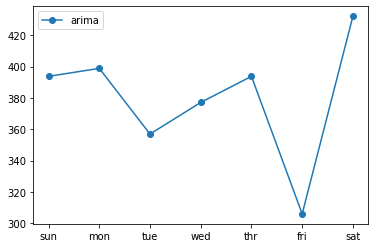

In [6]:
# arima forecast for the power usage dataset
from math import sqrt
from numpy import split
from numpy import array
from pandas import read_csv
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA

# split a univariate dataset into train/test sets
def split_dataset(data):
    # split into standard weeks
    train, test = data[1:-328], data[-328:-6]
    # restructure into windows of weekly data
    train = array(split(train, len(train)/7))
    test = array(split(test, len(test)/7))
    return train, test

# evaluate one or more weekly forecasts against expected values
def evaluate_forecasts(actual, predicted):
    scores = list()
    # calculate an RMSE score for each day
    for i in range(actual.shape[1]):
        # calculate mse
        mse = mean_squared_error(actual[:, i], predicted[:, i])
        # calculate rmse
        rmse = sqrt(mse)
        # store
        scores.append(rmse)
    
    # calculate overall RMSE
    s=0
    for row in range(actual.shape[0]):
        for col in range(actual.shape[1]):
            s += (actual[row, col] - predicted[row, col])**2
    score = sqrt(s / (actual.shape[0] * actual.shape[1]))
    return score, scores

# summarize scores
def summarize_scores(name, score, scores):
    s_scores = ', '.join(['%.1f' % s for s in scores]) 
    print('%s: [%.3f] %s' % (name, score, s_scores))

# evaluate a single model
def evaluate_model(model_func, train, test):
    # history is a list of weekly data
    history = [x for x in train]
    # walk-forward validation over each week
    predictions = list()
    for i in range(len(test)):
        # predict the week
        yhat_sequence = model_func(history)
        # store the predictions
        predictions.append(yhat_sequence)
        # get real observation and add to history for predicting the next week
        history.append(test[i, :])
    predictions = array(predictions)
    # evaluate predictions days for each week
    score, scores = evaluate_forecasts(test[:, :, 0], predictions)
    return score, scores
# convert windows of weekly multivariate data into a series of total power
def to_series(data):
    # extract just the total power from each week
    series = [week[:, 0] for week in data]
    # flatten into a single series
    series = array(series).flatten()
    return series

# arima forecast
def arima_forecast(history):
    # convert history into a univariate series
    series = to_series(history)
    # define the model
    model = ARIMA(series, order=(7,0,0))
    # fit the model
    model_fit = model.fit(disp=False)
    # make forecast
    yhat = model_fit.predict(len(series), len(series)+6)
    return yhat

if __name__ == '__main__':
    # load the new file
    dataset = read_csv('household_power_consumption_days.csv', header=0, infer_datetime_format=True, parse_dates=['datetime'], index_col=['datetime'])
    # split into train and test
    train, test = split_dataset(dataset.values)
    # define the names and functions for the models we wish to evaluate
    models = dict()
    models['arima'] = arima_forecast
    # evaluate each model
    days = ['sun', 'mon', 'tue', 'wed', 'thr', 'fri', 'sat'] 
    for name, func in models.items():
        # evaluate and get scores
        score, scores = evaluate_model(func, train, test)
        # summarize scores
        summarize_scores(name, score, scores)
        # plot scores
        pyplot.plot(days, scores, marker='o', label=name) # show plot
    pyplot.legend()
    pyplot.show()

In [7]:
models.items()

dict_items([('arima', <function arima_forecast at 0x7fddec6b11f0>)])

A line plot of the forecast is also created, showing the RMSE in kilowatts for each of the seven lead times of the forecast. We can see an interesting pattern. We might expect that earlier lead times are easier to forecast than later lead times, as the error at each successive lead time compounds. Instead, we see that Friday (lead time +6) is the easiest to forecast and Saturday (lead time +7) is the most challenging to forecast. We can also see that the remaining lead times all have a similar error in the mid- to high-300 kilowatt range.


还创建了预测的折线图，显示预测的七个提前期中每个时间的RMSE（以千瓦为单位）。我们可以看到一个有趣的模式。我们可能认为较早的提前期比较晚的提前期更容易预测，因为每个连续的提前期的误差都会加剧。相反，我们看到周五（提前期 +6）最容易预测，周六（提前期 +7）最难预测。我们还可以看到，剩余的交货时间在中高300千瓦范围内都有类似的误差。


Extensions
This section lists some ideas for extending the tutorial that you may wish to explore.
- **Tune ARIMA**. The parameters of the ARIMA model were not tuned. Explore or search a suite of ARIMA parameters (q, d, p) to see if performance can be further improved.
- **Explore Seasonal AR**. Explore whether the performance of the AR model can be improved by including seasonal autoregression elements. This may require the use of a SARIMA model.
- **Explore ETS**. Explore whether better results may be achieved by using an ETS model
instead of an ARIMA model.
- **Explore Data Preparation**. The model was fit on the raw data directly. Explore whether standardization or normalization or even power transforms can further improve the skill of the AR model.

## 18.9 Summary
In this tutorial, you discovered how to develop and evaluate an autoregression model for multi-step forecasting household power consumption. Specifically, you learned:
- How to create and analyze autocorrelation and partial autocorrelation plots for univariate time series data.
- How to use the findings from autocorrelation plots to configure an autoregression model.
- How to develop and evaluate an autocorrelation model used to make one-week forecasts.
